In [1]:
import pandas as pd # for data preprocessing
import seaborn as sns 
import numpy as np # for algebra
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('wine_data.csv', header = None, usecols = [0, 1, 2])
df.columns = ['Class label', 'Alcohol', 'Malik acid']

In [13]:
df

,Class label,Alcohol,Malik acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

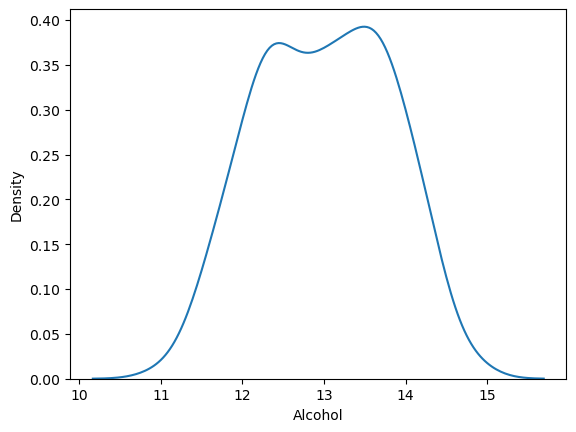

In [23]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malik acid', ylabel='Density'>

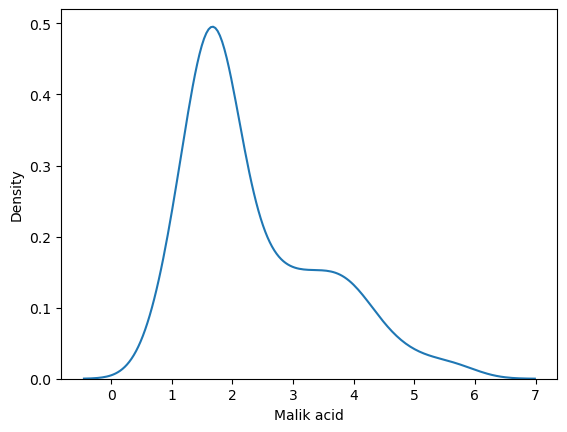

In [27]:
sns.kdeplot(df['Malik acid'])

<Axes: xlabel='Alcohol', ylabel='Malik acid'>

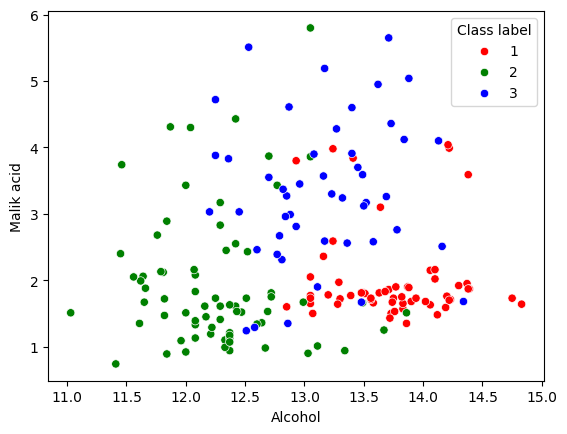

In [33]:
color_dic = {1: 'red', 2 : 'green', 3: 'blue'}
sns.scatterplot(x = df['Alcohol'], y = df['Malik acid'], hue = df['Class label'], palette = color_dic)

In [43]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Class label', axis = 1),
                                                   df['Class label'], 
                                                   test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train data
# we will fit only train data but test and train data both will be carried through transform
scaler.fit(X_train)

# Transform train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# After doing transform, sklearn change the data into numpy array therefore below step is done to change the data into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [63]:
# understanding the acctual dataset
np.round(X_train.describe(), 1)

,Alcohol,Malik acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [67]:
# understanding the scaled train dataset
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malik acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


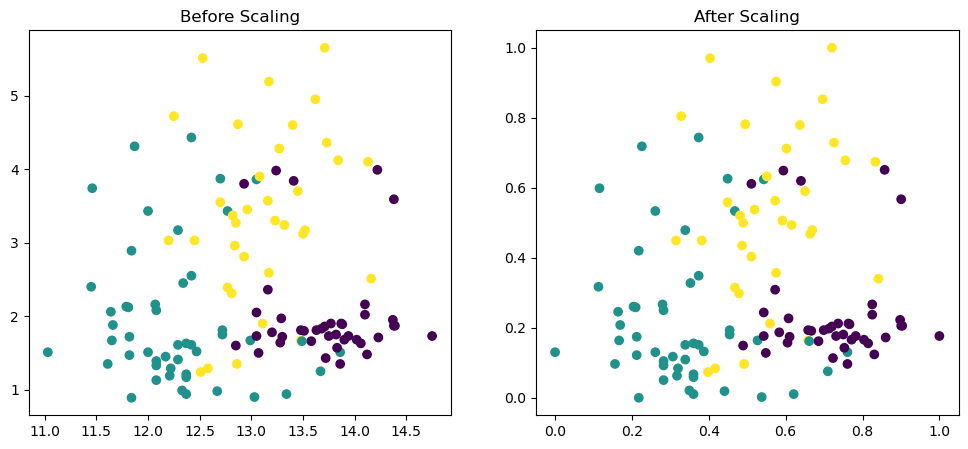

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Alcohol'], X_train['Malik acid'], c = Y_train)

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malik acid'], c = Y_train)

plt.show()


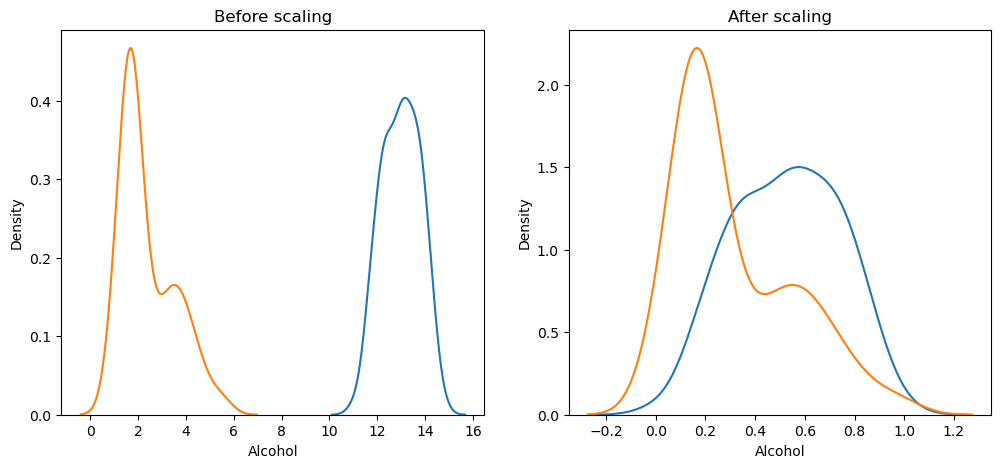

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malik acid'], ax = ax1)

ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malik acid'], ax = ax2)
plt.show()

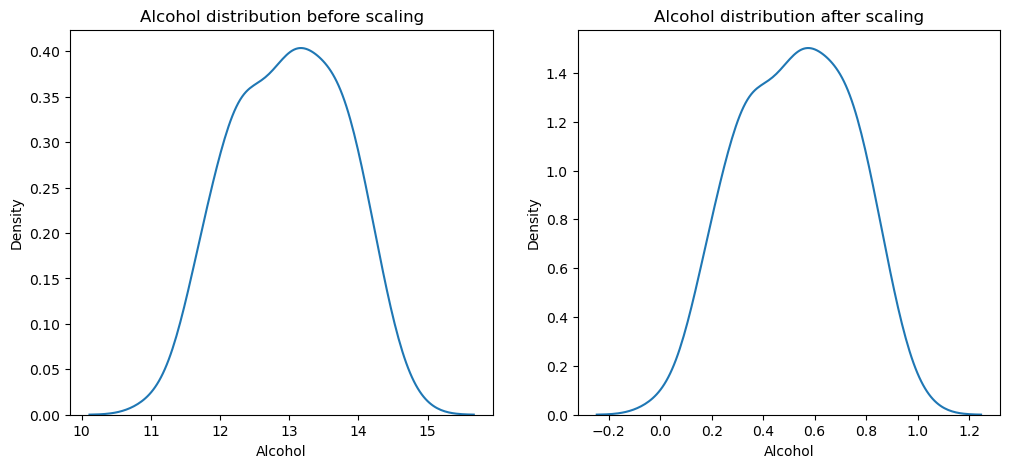

In [91]:
# Since, the distribution 0f Alochol column before and after the scaling is same only the magnitude/unit is changed
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize= (12, 5))

ax1.set_title('Alcohol distribution before scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)

ax2.set_title('Alcohol distribution after scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)

plt.show()

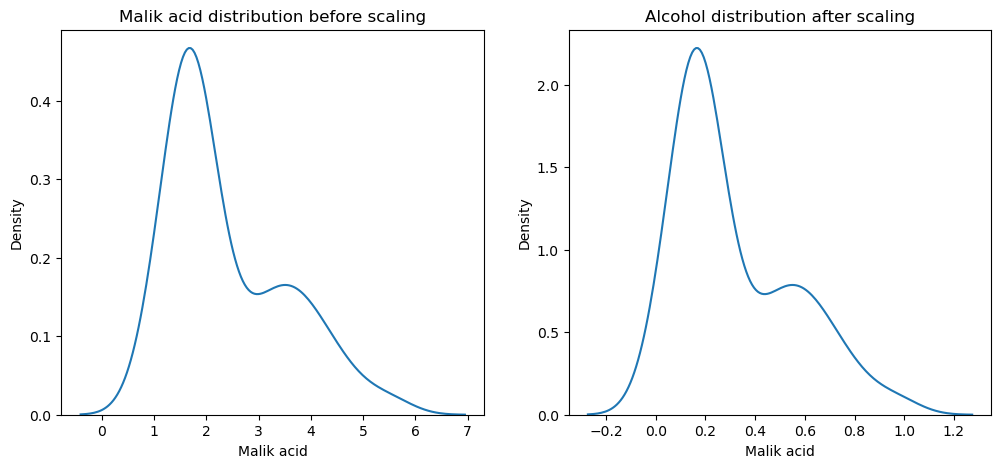

In [93]:
# Since, the distribution of Malik acid before and after the scaling is same only the magnitude/unit is changed
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize= (12, 5))

ax1.set_title('Malik acid distribution before scaling')
sns.kdeplot(X_train['Malik acid'], ax = ax1)

ax2.set_title('Alcohol distribution after scaling')
sns.kdeplot(X_train_scaled['Malik acid'], ax = ax2)

plt.show()